In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nlh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'ticks']


In [ ]:
## NLH
##########################################
##########################################
titleL = '272'#'b2v5c2'
titleL80 = 'mix80'#'b2v5c2'
titleH = 'c2b1v3H'
thresh = 5.00e-03
##########################################
##########################################

labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
H_list = ['ph{}_c'.format(titleH)+i+'.dat' for i in labs_mod]
L_list = ['ph{}_c'.format(titleL)+i+'.dat' for i in labs_mod]
L80_list = ['ph{}_c'.format(titleL80)+i+'.dat' for i in labs_mod]
H_list = [GIT+i for i in H_list]
L_list = [GIT+i for i in L_list]
algs = ['thresh', 'maxpt', 'norm']

Hs = pd.DataFrame([np.zeros(len(H_list))]*5, index=['cs', 'kapd']+algs).transpose()
Hs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Hs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Hs.cs]
for algind in range(3):
    for i in range(len(H_list)): 
      Hs.iloc[i, algind+2] = tjy.H_find(H_list[i], alg=algs[algind], thresh=thresh)
print(Hs)
Ls = pd.DataFrame([np.zeros(len(L_list))]*5, index=['cs', 'kapd']+algs).transpose()
Ls.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Ls.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Ls.cs]
for algind in range(3):
    for i in range(len(L_list)): 
      Ls.iloc[i, algind+2] = tjy.H_find(L_list[i], alg=algs[algind], thresh=thresh)
print(Ls)
L80 = pd.DataFrame([np.zeros(len(L80_list))]*5, index=['cs', 'kapd']+algs).transpose()
L80.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
L80.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L80.cs]
for algind in range(3):
    for i in range(len(L80_list)): 
      L80.iloc[i, algind+2] = tjy.H_find(L80_list[i], alg=algs[algind], thresh=thresh)
print(L80)

      cs      kapd    thresh     maxpt      norm
0    1.5  7.871251  6.614440  4.789599  6.028555
1    3.0  5.565815  6.576320  4.759879  6.001828
2    5.0  4.311262  6.546940  4.737833  5.979418
3    7.0  3.643681  6.524681  4.723478  5.963495
4   10.0  3.048522  6.498304  4.708342  5.945295
5   20.0  2.155631  6.448160  4.682870  5.912749
6   50.0  1.363341  6.400605  4.659623  5.881009
7  150.0  0.787125  6.365199  4.645545  5.860863


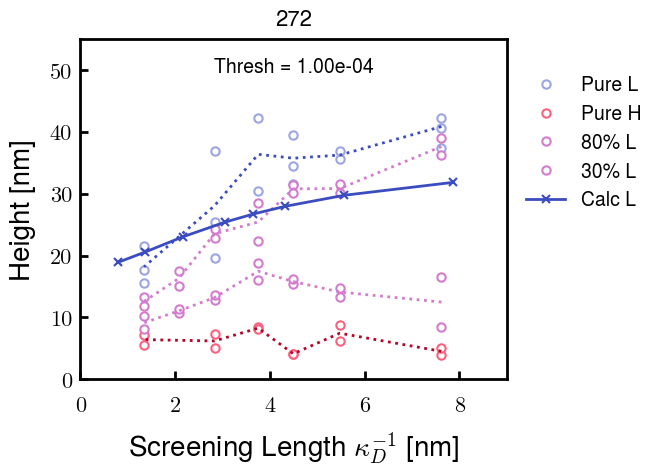

In [13]:
#EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADcs2 = [1.6, 3.1, 4.6, 6.6, 11.6, 21.6, 51.6]
EADcs3 = [1.6, 4.6, 11.6, 51.6]

EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADdeb2 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs2]
EADdeb3 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs3]

EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADL_3, EADL_3n = [42.18774154, 34.42681131, 36.94680269, 21.60936372], [42.18774154, np.nan, 34.42681131, np.nan, 36.94680269, 21.60936372]
EADL_4, EADL_4n = [43.32828107, 37.47239234, 30.41876754, 17.88987109], [43.32828107, np.nan, 37.47239234, np.nan, 30.41876754, 17.88987109]
EADL_a = np.nanmean(np.array([EADL_1, EADL_2, EADL_3n, EADL_4n]), axis=0)

EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]
EADH_3 = [4.300001733, 3.849165782, 4.263458652, 3.577032201]
EADH_a = np.mean(np.array([EADH_1, EADH_2]), axis=0)

EAD80_1 = [39.0904899, 31.6319996, 31.4951879, 22.2966476, 22.8323448, 15.1019332, 11.9286194]
EAD80_2 = [36.2127833, 30.0737538, 30.1231263, 28.5908979, 24.2522966, 17.5124717, 13.271754]
EAD80_a = np.mean(np.array([EAD80_1, EAD80_2]), axis=0)
EAD30_1 = [8.40892663, 13.392325, 15.4668739, 18.8685071, 12.7833741, 10.7519308, 8.06502549]
EAD30_2 = [16.5840688, 14.8418816, 16.1486509, 16.0967578, 13.6481441, 11.375515, 10.2151375]
EAD30_a = np.mean(np.array([EAD30_1, EAD30_2]), axis=0)

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)
for i in [0]:
    plt.plot(EADdeb, EADL_1, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
    plt.plot(EADdeb, EADL_2, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    plt.plot(EADdeb3, EADL_3, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    plt.plot(EADdeb, EADL_a, ':', color=tjy.lighten_color(cool_blue,1.0), label="_Pure L")
    plt.plot(EADdeb, EADH_1, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
    plt.plot(EADdeb, EADH_2, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")
    plt.plot(EADdeb, EADH_a, ':', color=tjy.lighten_color(warm_red,1.0), label="_Pure L")
    plt.plot(EADdeb2, EAD80_1, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="80% L")
    plt.plot(EADdeb2, EAD80_2, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_80% L")
    plt.plot(EADdeb2, EAD80_a, ':', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_80% L")
    plt.plot(EADdeb2, EAD30_1, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="30% L")
    plt.plot(EADdeb2, EAD30_2, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_30% L")
    plt.plot(EADdeb2, EAD30_a, ':', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_30% L")
    plt.xlim(0, 9)
    plt.ylim(0, 55)
    plt.title(r"")
    plt.ylabel('Height' ' [nm]')
    plt.xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
    plt.xticks([0, 2, 4, 6, 8])

## Data Plotting 
text_loc = (0.50, 0.92)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
H_kw = {'color': warm_red,  'marker': 'x'}
# norm
# plt.sca(axs[0])
# plt.text(*text_loc,'Norm'.format(thresh), transform=plt.gca().transAxes, **text_kw)
# plt.plot(Ls.kapd, Ls.norm, label= 'Calc L', **L_kw)
# thresh
# plt.sca(axs[1])
plt.text(*text_loc,'Thresh = {:.2e}'.format(thresh), transform=plt.gca().transAxes, **text_kw)
plt.plot(Ls.kapd, Ls.thresh, label= 'Calc L', **L_kw)
# plt.plot(Hs.kapd, Hs.thresh, label= 'Calc H', **H_kw)

leg = axs.legend(bbox_to_anchor=(1.00,0.95), loc='upper left', fontsize=14, borderpad=0)
# axs.set_title(titleH +' & '+ titleL,fontsize=16)
axs.set_title(titleL,fontsize=16)
tjy.ticks()
plt.show()

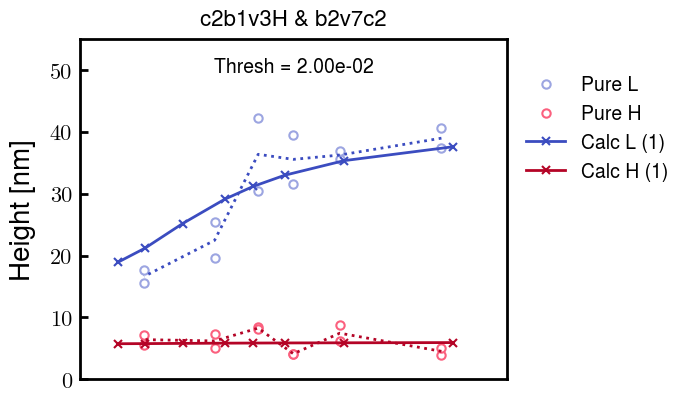

In [4]:
#EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADL_a = np.mean(np.array([EADL_1, EADL_2]), axis=0)
EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]
EADH_a = np.mean(np.array([EADH_1, EADH_2]), axis=0)


## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)
# for i in range(3):
for i in [0]:
    plt.plot(EADdeb, EADL_1, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
    plt.plot(EADdeb, EADL_2, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    plt.plot(EADdeb, EADL_a, ':', color=tjy.lighten_color(cool_blue,1.0), label="_Pure L")
    plt.plot(EADdeb, EADH_1, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
    plt.plot(EADdeb, EADH_2, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")
    plt.plot(EADdeb, EADH_a, ':', color=tjy.lighten_color(warm_red,1.0), label="_Pure L")
    plt.xlim(0, 9)
    plt.ylim(0, 55)
    plt.title(r"")
    plt.ylabel('Height' ' [nm]')
    if i==2: 
        plt.xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
        plt.xticks([0, 2, 4, 6, 8])
    else: plt.xticks([])

## Data Plotting 
text_loc = (0.50, 0.92)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
H_kw = {'color': warm_red,  'marker': 'x'}
# thresh
plt.text(*text_loc,'Thresh = {:.2e}'.format(thresh), transform=plt.gca().transAxes, **text_kw)
norm = [1, 1]
plt.plot(Ls.kapd, Ls.thresh/norm[0], label= 'Calc L ({})'.format(norm[0]), **L_kw)
plt.plot(Hs.kapd, Hs.thresh/norm[1], label= 'Calc H ({})'.format(norm[1]), **H_kw)

leg = axs.legend(bbox_to_anchor=(1.00,0.95), loc='upper left', fontsize=14, borderpad=0)
axs.set_title(titleH +' & '+ titleL,fontsize=16)
tjy.ticks()
plt.show()

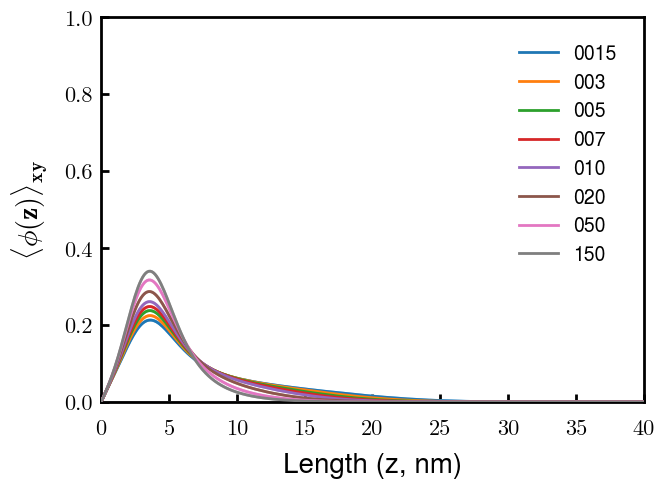

In [ ]:
labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
read_list = [GIT+"ph257_c"+i+".dat" for i in labs_mod]
block_Ni = [[4,1]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=40, block_Ni=block_Ni, labs=labs, double=False)

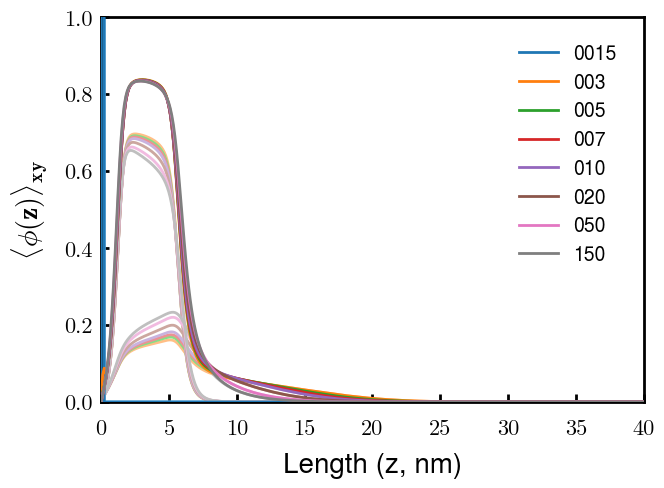

In [35]:
labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
read_list = [GIT+"phmix80_c"+i+".dat" for i in labs_mod]
block_Ni = [[4, 7]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, b0=1.00, x1_end=40, block_Ni=block_Ni, labs=labs, double=False)

In [6]:
labs =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(labs) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb204_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(labs)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

b0 = 2.0 ########################################################

print("[", end="")
for i in range(len(read_list)): 
  print(Gibbsf(read_list[i], b0), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb204_c004.dat', 'phb204_c005.dat', 'phb204_c006.dat', 'phb204_c008.dat', 'phb204_c010.dat', 'phb204_c015.dat', 'phb204_c020.dat', 'phb204_c030.dat', 'phb204_c040.dat', 'phb204_c050.dat']
[

NameError: name 'Gibbsf' is not defined

In [8]:
read_list = ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125',
              '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
x = [float(i)/100 for i in read_list]
read_list = ['p1a0_x'+i+'.dat' for i in read_list]
H = [Gibbsf(i, 1.0) for i in read_list]

FileNotFoundError: [Errno 2] No such file or directory: 'p1a0_x040.dat'

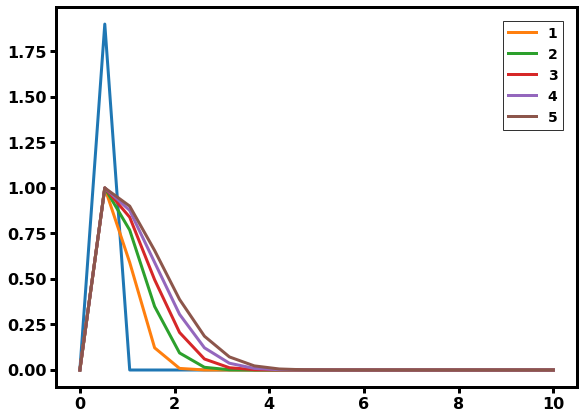

In [ ]:
plt.figure()
x = np.linspace(0,10,20)
dx = x[1]-x[0]
y = [0] + [1/dx]+[0]*(len(x)-2)
plt.plot(x, y)

for i in [1, 2, 3, 4, 5]:
  yg = np.exp(-(x-x[1])**2/(i*dx))
  yg[0] = 0    
  plt.plot(x, yg, label=i)
plt.legend()
plt.show()